<a href="https://colab.research.google.com/github/Dev45D/TITANIC_EDA_PROJECT/blob/main/EDA_TITANIC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import all needed libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

print("All Modules Initialized 🚀")
URL = "/titanic.csv"
titanic_df = pd.read_csv(URL)

print("Data Imported Successfully 🚀")




All Modules Initialized 🚀
Data Imported Successfully 🚀


In [ ]:

# Change the Column names
titanic_df = titanic_df.rename(columns = {
    'pclass':'ticket_class',
    'ticker' : 'ticker_number',
    'cabin' : 'cabin_number',
})

In [ ]:
titanic_df["Embarked"].replace({
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S" : "Southampton"
}, inplace=True)


In [ ]:
titanic_df.drop("PassengerId", axis = 1, inplace = True)



In [ ]:
titanic_df.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton


In [ ]:
titanic_df.tail(5)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,Cherbourg


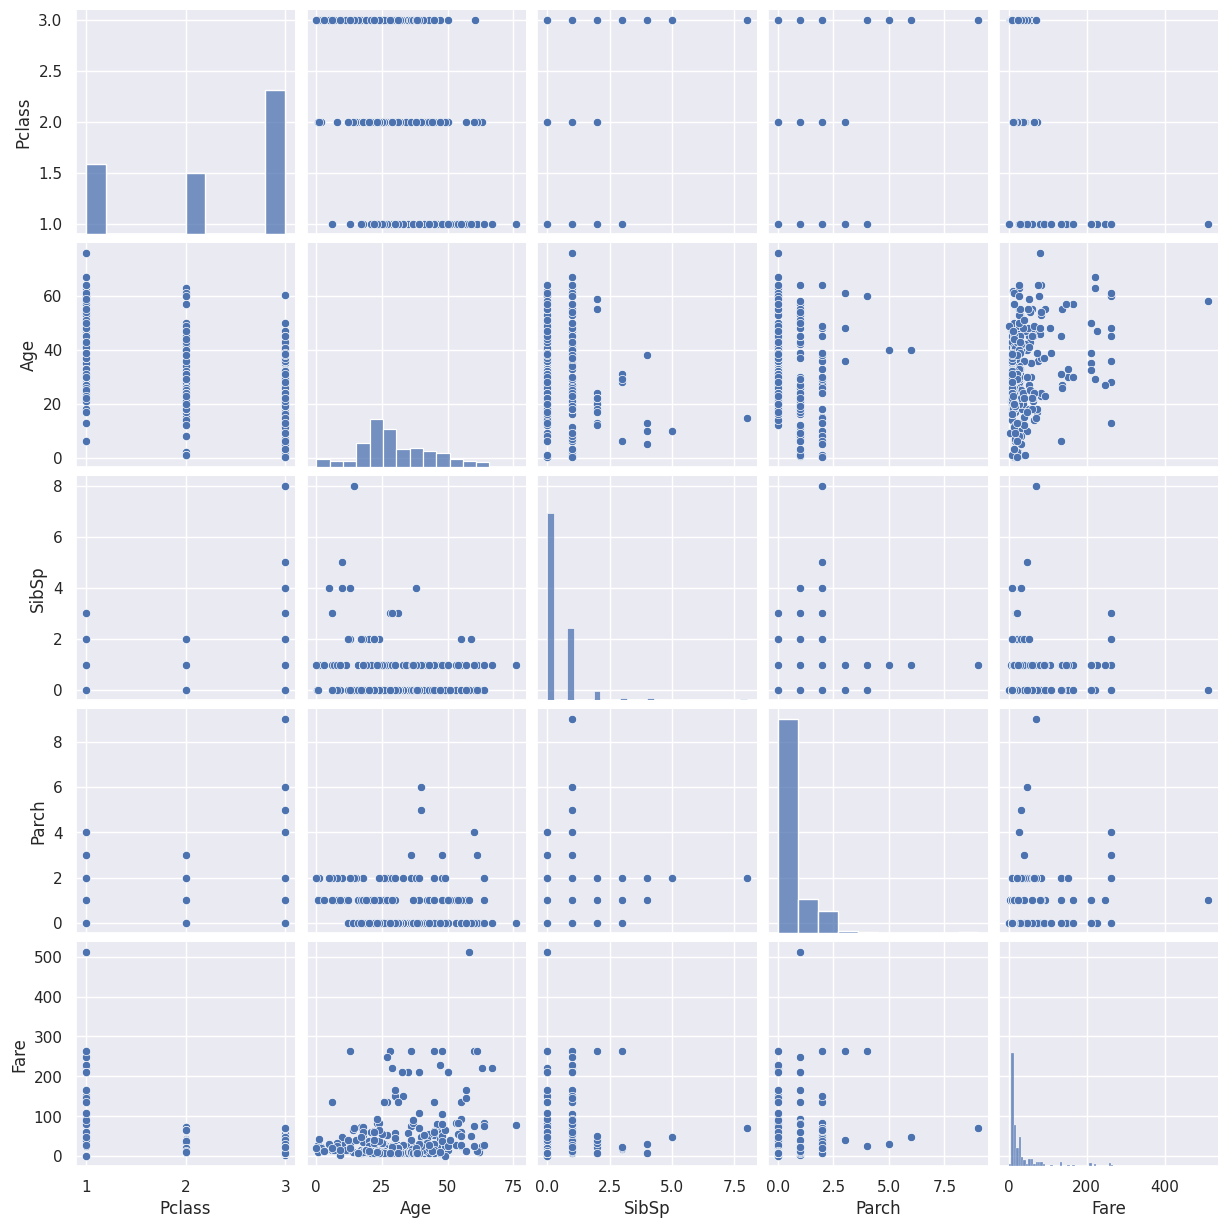

In [ ]:
# plt.style.use("seaborn-notebook") # Remove this line as 'seaborn-notebook' is not a valid style
sns.set(rc={'figure.figsize':(11.7,8.27)}) # sns.set is sufficient for applying seaborn styles
sns.pairplot(titanic_df)
plt.show()

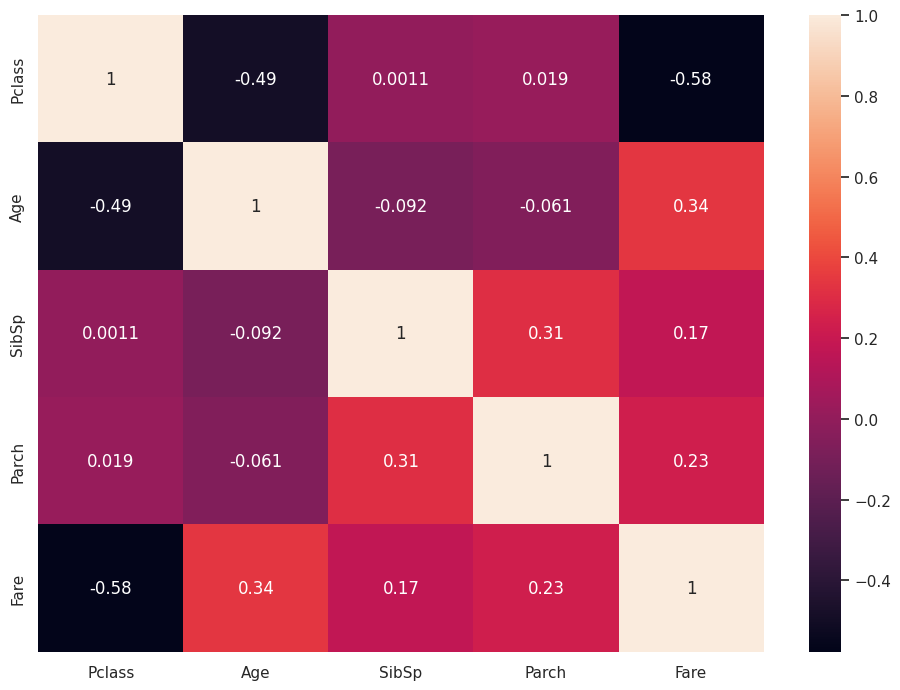

In [ ]:
# Drop non-numeric columns that cannot be used for correlation calculation
columns_to_drop = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
# Check which of the columns to drop actually exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in titanic_df.columns]
# If there are columns to drop that exist, drop them
if existing_columns_to_drop:
    titanic_df = titanic_df.drop(existing_columns_to_drop, axis=1)

titanic_mx = titanic_df.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(titanic_mx, annot=True, cmap='rocket')
plt.show()

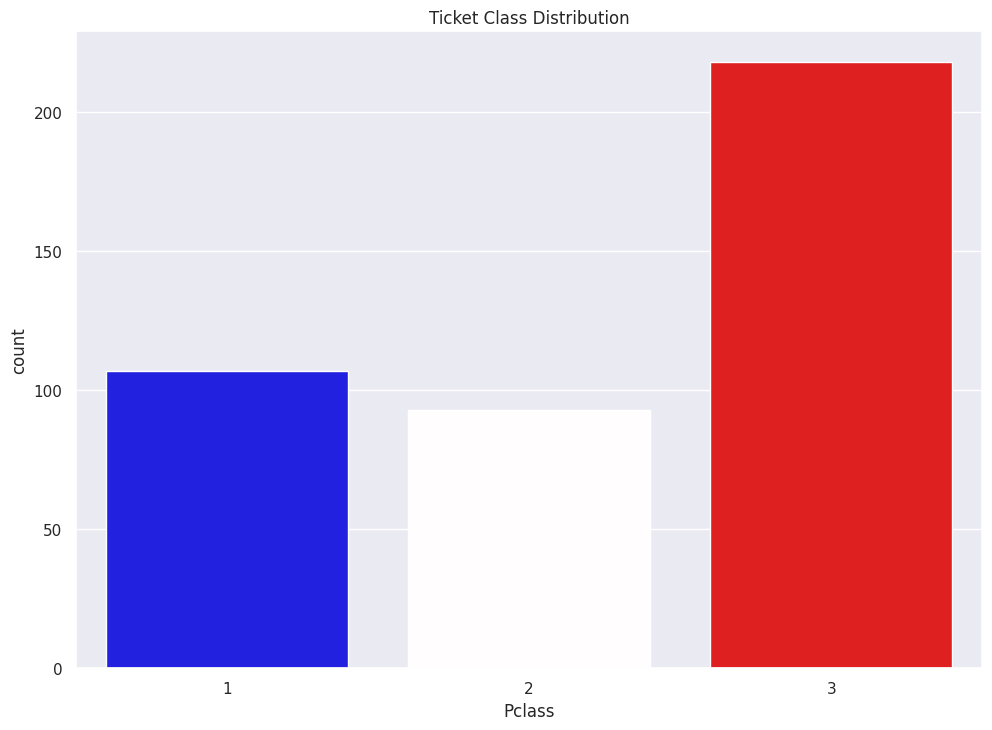

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=titanic_df, x="Pclass", palette="seismic").set(
    title = "Ticket Class Distribution"
)
plt.show()


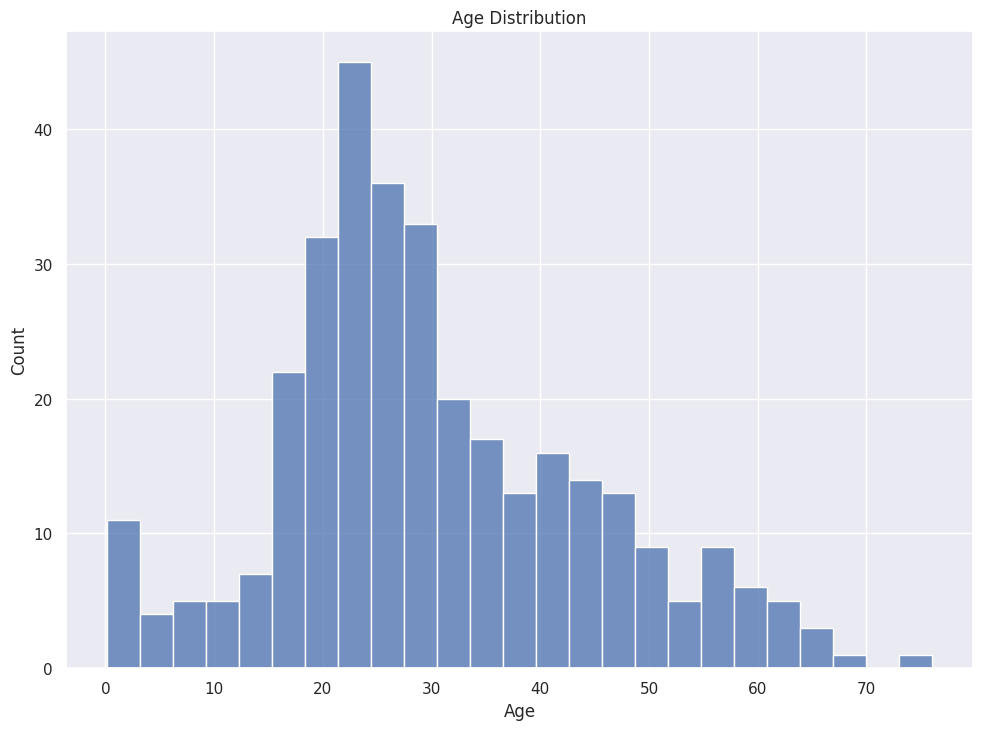

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(titanic_df, x="Age", bins=25).set(
    title = "Age Distribution"
)
plt.show()

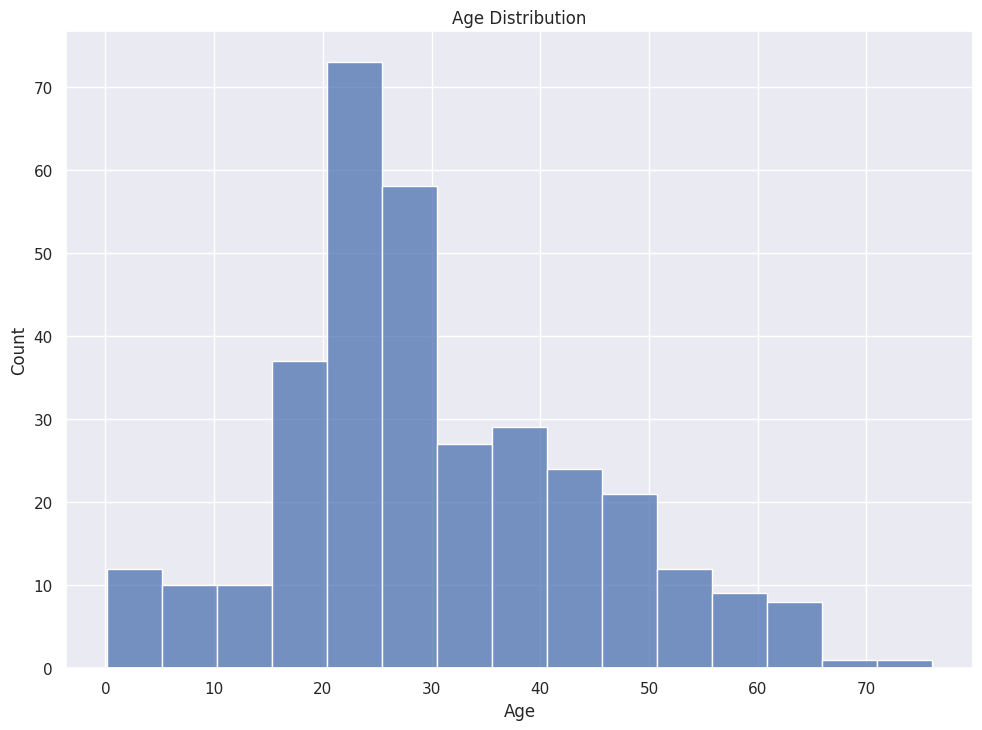

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(titanic_df, x="Age").set(
    title = "Age Distribution"
)
plt.show()


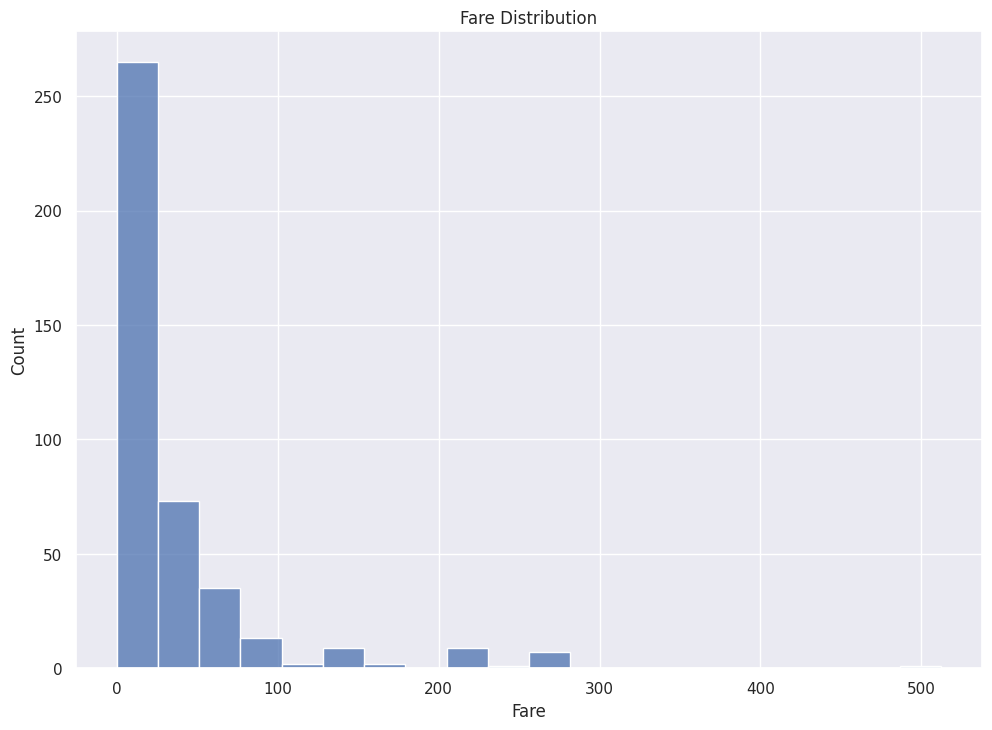

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(titanic_df, x="Fare", bins=20).set(
    title = "Fare Distribution"
)
plt.show()

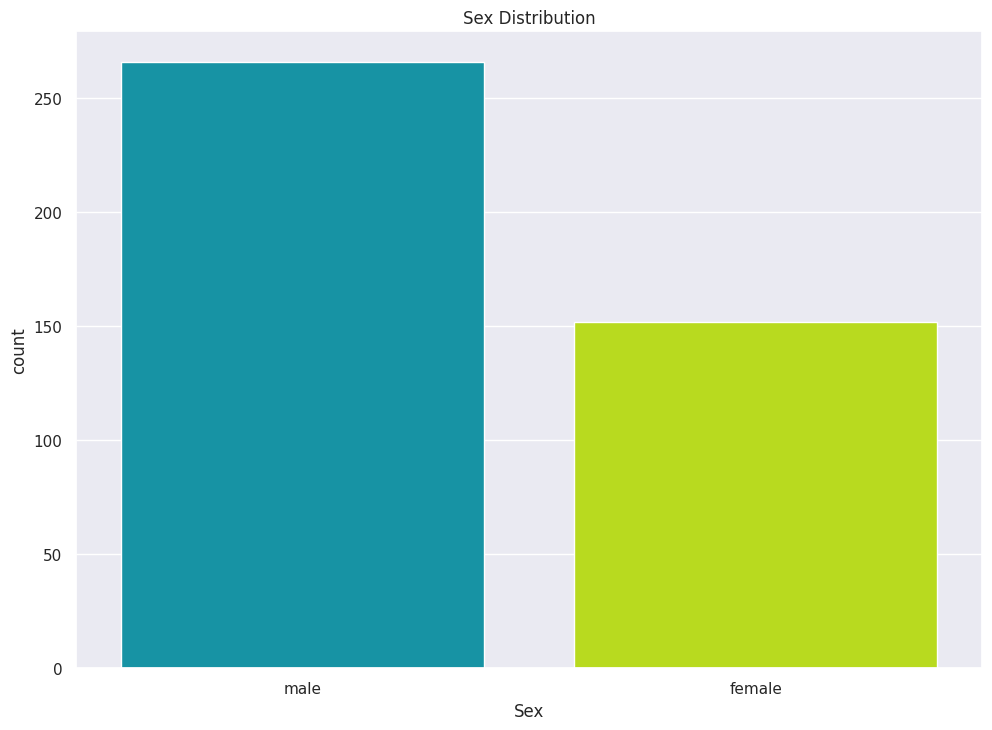

In [ ]:
# Reload the dataset to ensure 'Sex' column is present
URL = "/titanic.csv"
titanic_df = pd.read_csv(URL)

# Apply previous transformations that are needed and don't drop 'Sex'
titanic_df = titanic_df.rename(columns = {
    'pclass':'ticket_class',
    'ticker' : 'ticker_number',
    'cabin' : 'cabin_number',
})

titanic_df["Embarked"].replace({
    "C": "Cherbourg",
    "Q": "Queenstown",
    "S" : "Southampton"
}, inplace=True)

titanic_df.drop("PassengerId", axis = 1, inplace = True)


# Now plot the Sex distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = titanic_df, x="Sex", palette="nipy_spectral").set(
    title = "Sex Distribution"
)
plt.show()

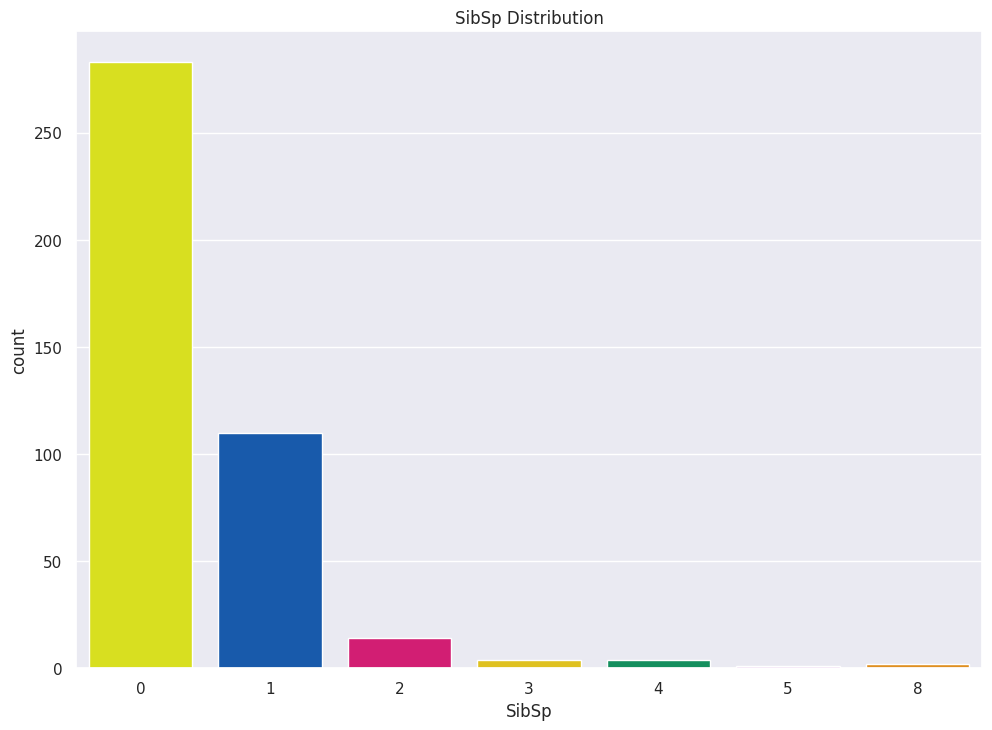

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = titanic_df, x="SibSp", palette="prism").set(
    title = "SibSp Distribution"
)
plt.show()


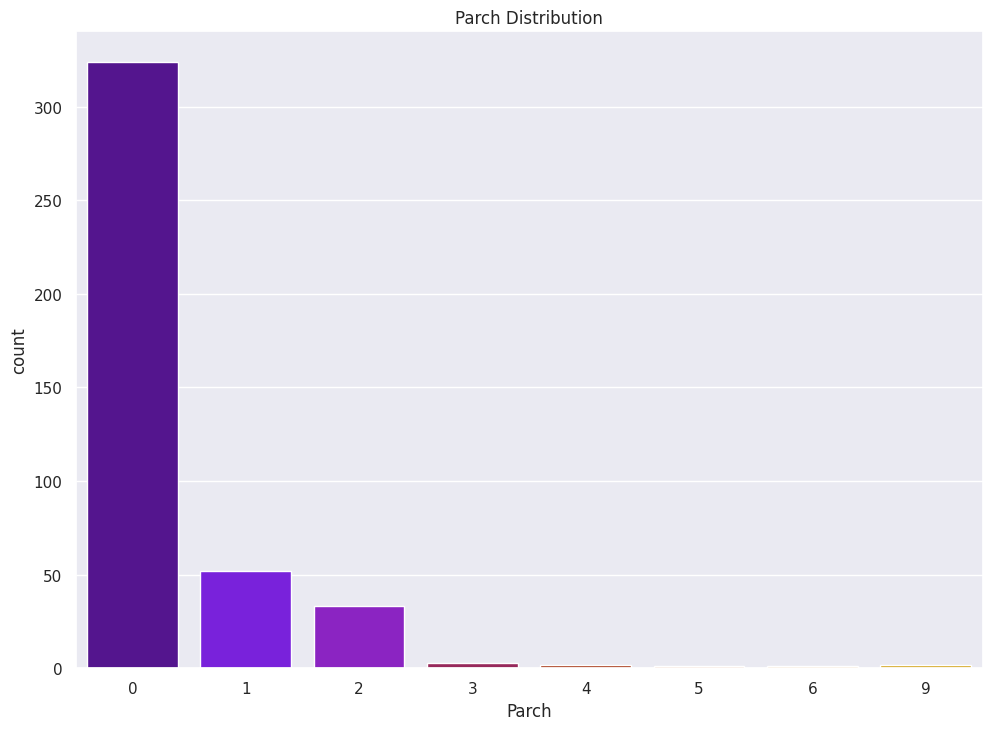

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = titanic_df, x="Parch", palette="gnuplot").set(
    title = "Parch Distribution"
)
plt.show()


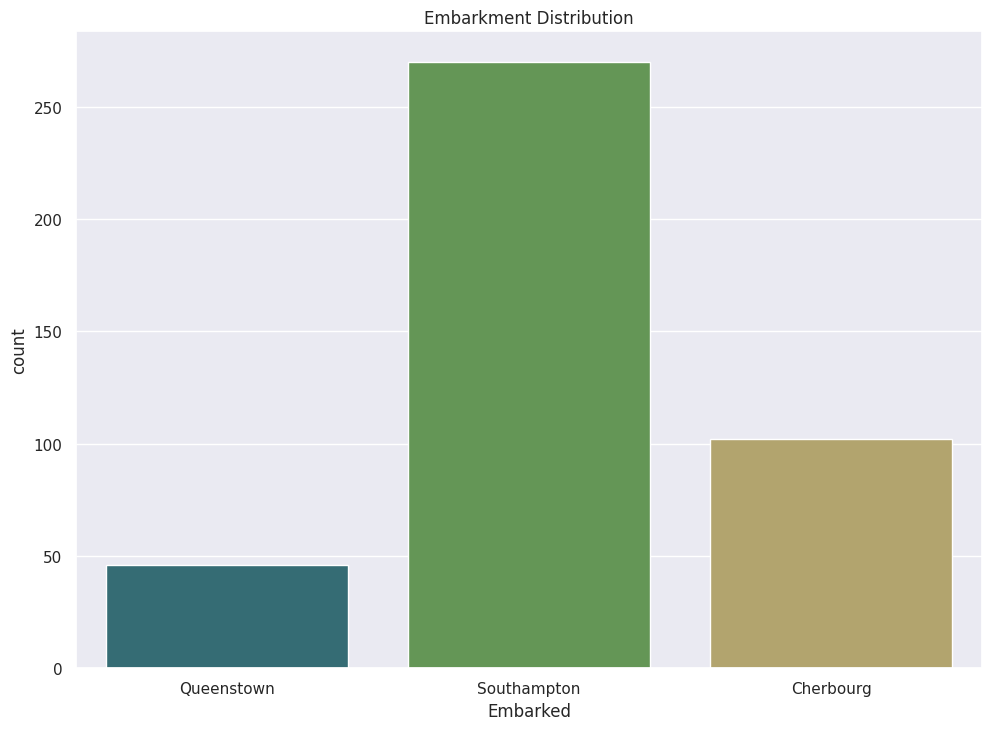

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = titanic_df, x="Embarked", palette="gist_earth").set(
    title = "Embarkment Distribution"
)
plt.show()



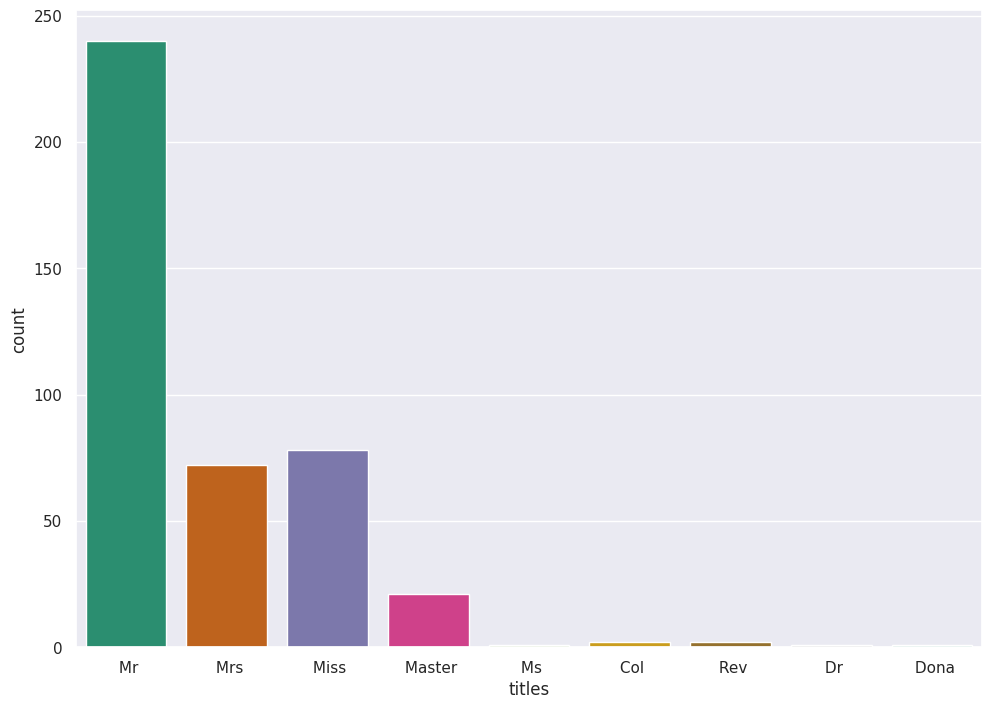

In [ ]:
def get_unique_titles(list1):
    # Initialize a null list
    unique_list = []
    # Traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # Print list
    for x in unique_list:
        print(x)

titles = [i.split(",")[1].split(".")[0] for i in titanic_df["Name"]]
# get_unique_titles(titles) # Just showing off my python skills 😉

titanic_df["titles"] = titles
sns.countplot(x="titles",data=titanic_df, palette="Dark2")
plt.show()

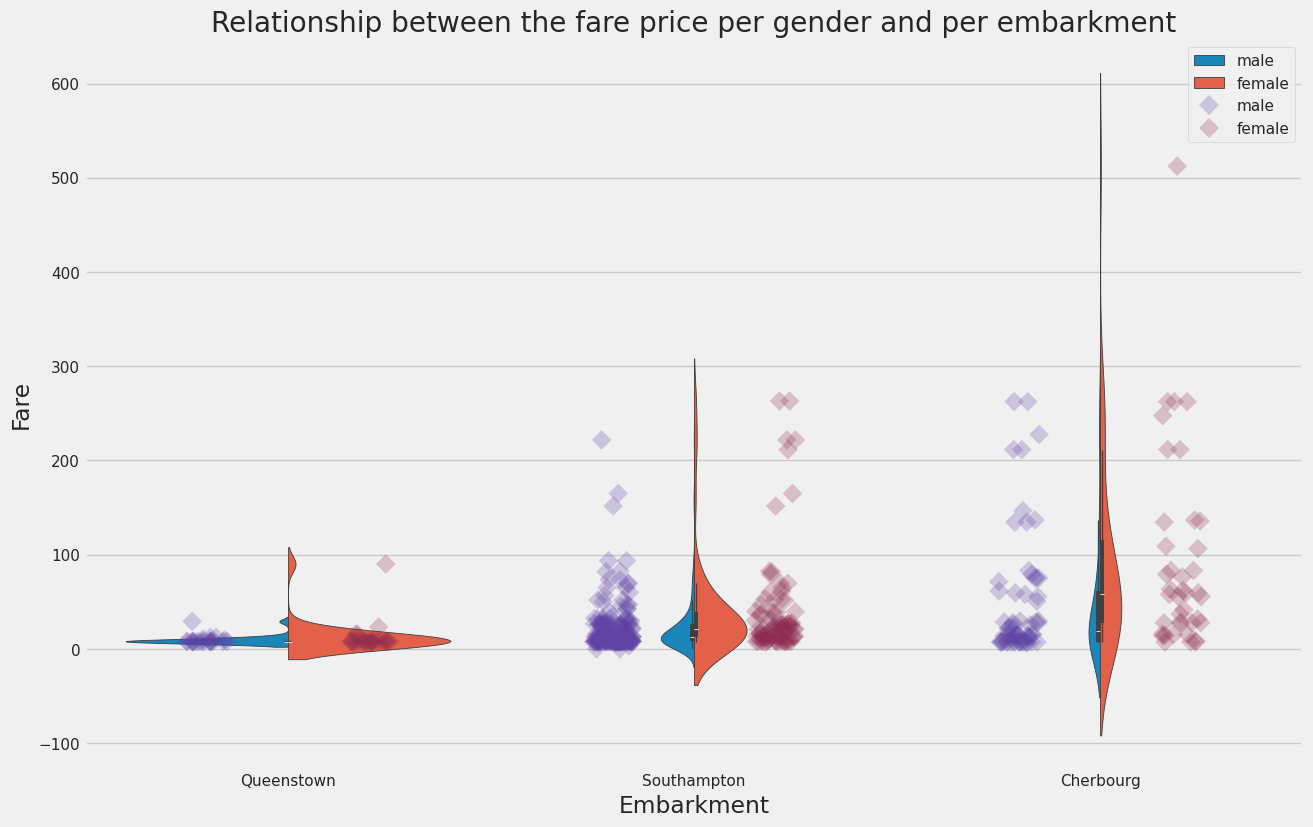

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,9))

sns.violinplot(x='Embarked',y='Fare',data=titanic_df, hue='Sex',split=True).set(
    title="Relationship between the fare price per gender and per embarkment",
    xlabel = "Embarkment",
)
sns.stripplot(x='Embarked',y='Fare',data=titanic_df, jitter=True,
              hue='Sex', dodge=True, palette="twilight",marker="D",size=10, edgecolor="gray", alpha=.25)

# Moves legend to the best position
plt.legend(loc=0)
plt.show()



In [ ]:
titanic_df



,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton,Mr


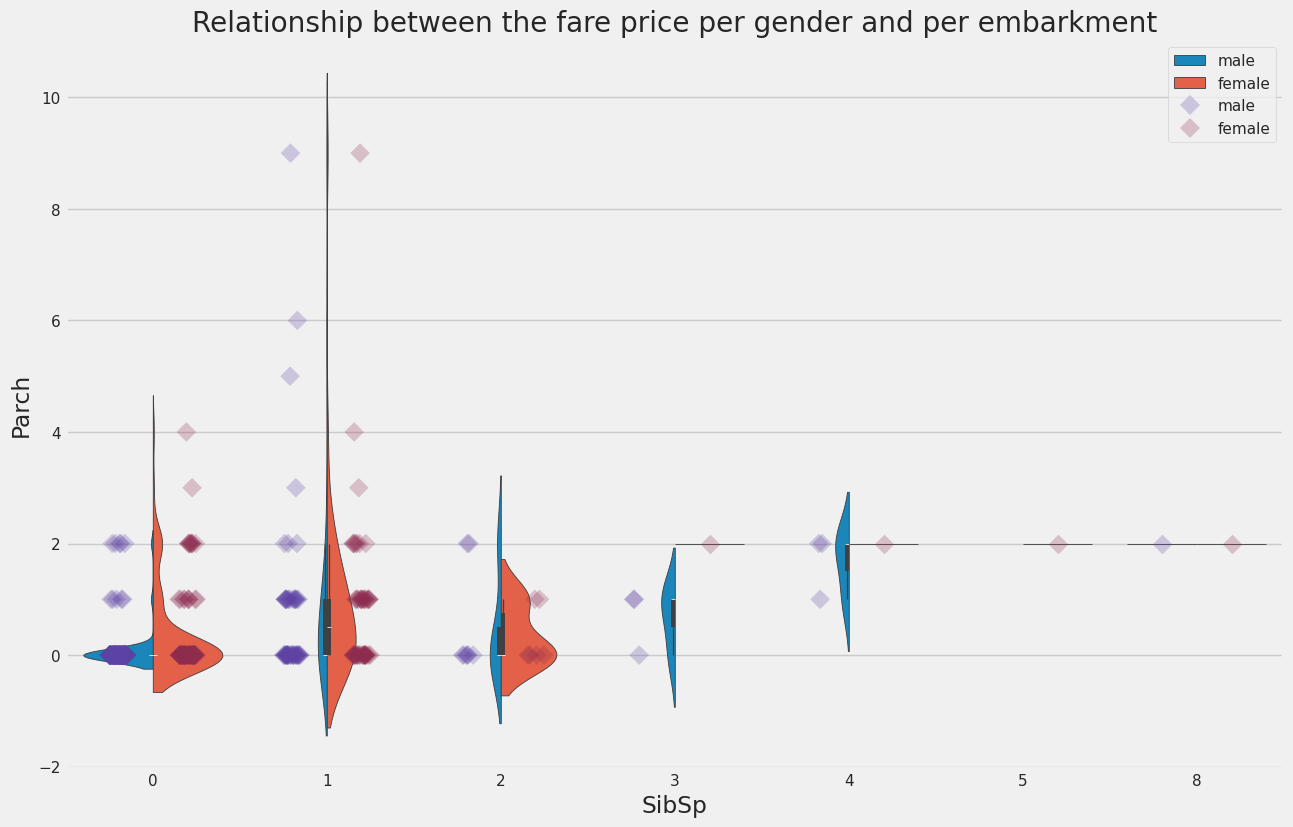

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,9))

sns.violinplot(x='SibSp',y='Parch',data=titanic_df, hue='Sex',split=True).set(
    title="Relationship between the fare price per gender and per embarkment",
)
sns.stripplot(x='SibSp',y='Parch',data=titanic_df, jitter=True,
              hue='Sex', dodge=True, palette="twilight",marker="D",size=10, edgecolor="gray", alpha=.25)

# Moves legend to the best position
plt.legend(loc=0)
plt.show()


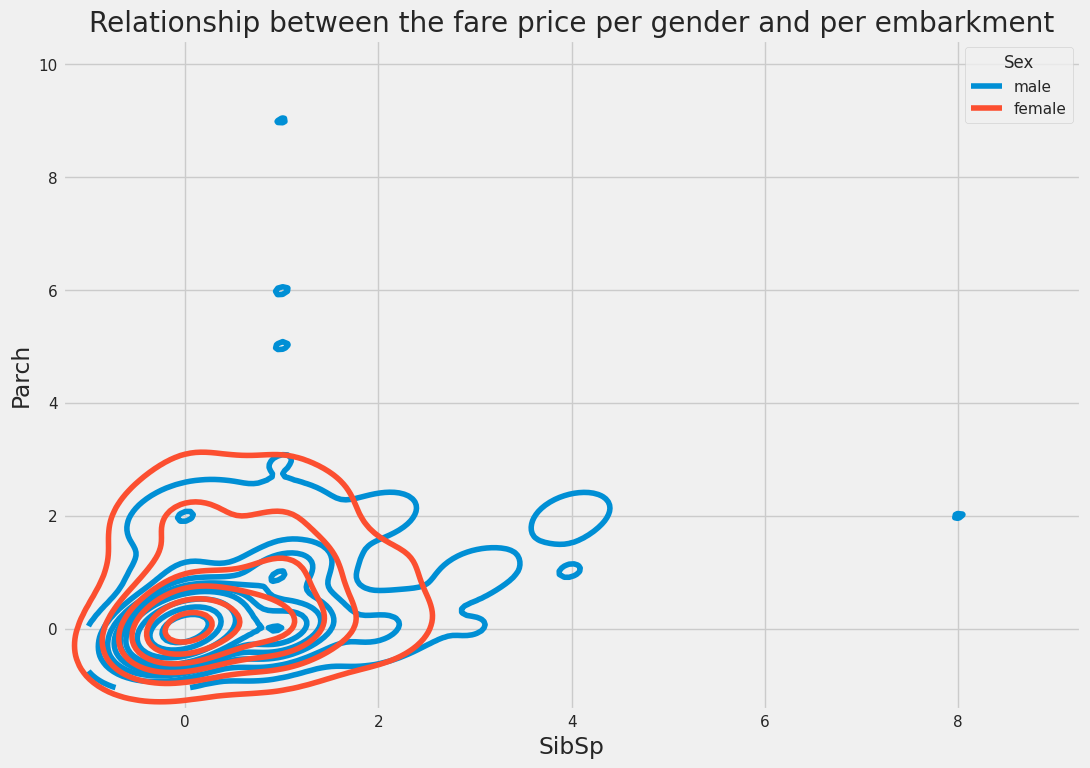

In [ ]:
sns.kdeplot(x='SibSp', y='Parch', hue='Sex', data=titanic_df).set(
    title="Relationship between the fare price per gender and per embarkment",
)

plt.show()

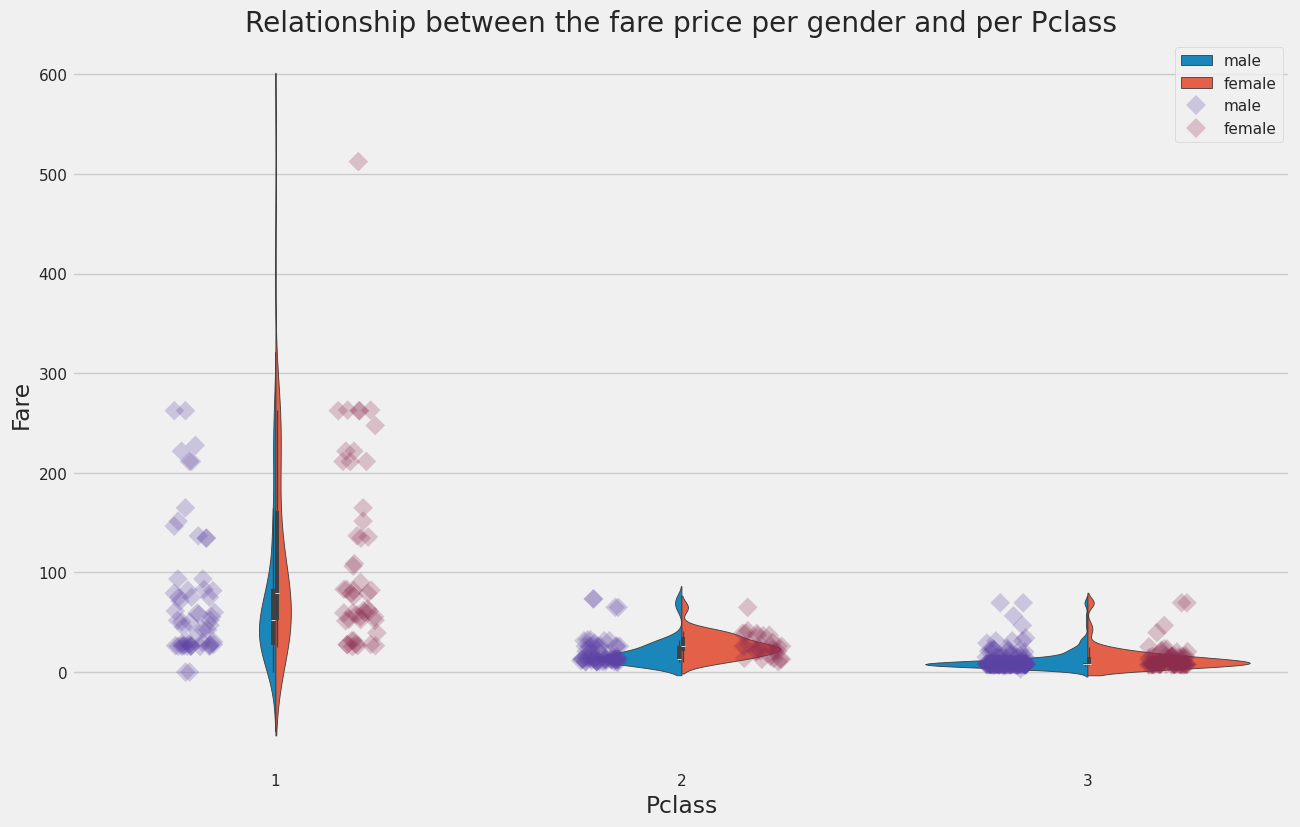

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14,9))

sns.violinplot(x='Pclass',y='Fare',data=titanic_df, hue='Sex',split=True).set(
    title="Relationship between the fare price per gender and per Pclass",
)
sns.stripplot(x='Pclass',y='Fare',data=titanic_df, jitter=True,
              hue='Sex', dodge=True, palette="twilight",marker="D",size=10, edgecolor="gray", alpha=.25)

# Moves legend to the best position
plt.legend(loc=0)
plt.show()



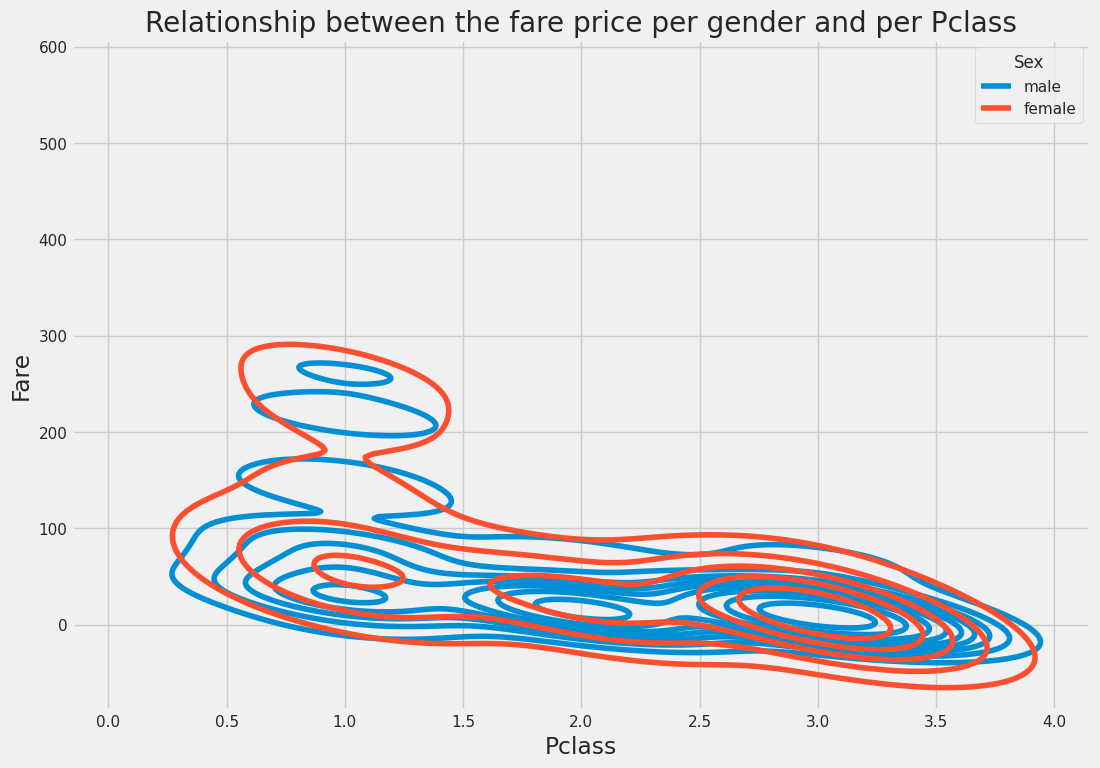

In [ ]:
sns.kdeplot(x='Pclass', y='Fare', hue='Sex', data=titanic_df).set(
    title="Relationship between the fare price per gender and per Pclass",
)

plt.show()

# New Section